In [3]:
#Create Connection 
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats import chi2_contingency
import numpy as np

server   = r"(LocalDb)\MSSQLLocalDb"   # your SQL Server instance
database = "ChurnDB"                   # your database name

connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
)

engine = create_engine(connection_string)



In [4]:
#Retriving the data
query = "SELECT  * FROM cust_info;"   # or your cleaned table/view name
df = pd.read_sql(query, engine)
df.head()


,Customer_ID,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Country,State,...,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Score,CLTV,Churn_Category,Churn_Reason
0,8779-QRDMV,Male,78,No,Yes,False,False,0,United States,California,...,20,0.000000,59.650002,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,True,True,1,United States,California,...,0,390.799988,1024.099976,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,False,True,3,United States,California,...,0,203.940002,1910.880005,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,True,True,1,United States,California,...,0,494.000000,2995.070068,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,True,True,1,United States,California,...,0,234.210007,3102.360107,2,Churned,Yes,67,2793,Price,Extra data charges


In [5]:

df.head()
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under_30                           7043 non-null   object 
 4   Senior_Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   bool   
 6   Dependents                         7043 non-null   bool   
 7   Number_of_Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip_Code                           7043 non-null   int64

Customer_ID                          0
Gender                               0
Age                                  0
Under_30                             0
Senior_Citizen                       0
Married                              0
Dependents                           0
Number_of_Dependents                 0
Country                              0
State                                0
City                                 0
Zip_Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred_a_Friend                    0
Number_of_Referrals                  0
Tenure_in_Months                     0
Offer                                0
Phone_Service                        0
Avg_Monthly_Long_Distance_Charges    0
Multiple_Lines                       0
Internet_Service                     0
Internet_Type                        0
Avg_Monthly_GB_Download  

In [6]:
# tenure bucket
df['tenure_bucket']= pd.cut(df['Tenure_in_Months'].fillna(0),
                            bins=[-1,1,6,12,24,48,120],
                            labels=['0-1 Months','1-6 Months','7-12 Months','13-24 Months','25-48 Months','49+ Months'])
df['age_bucket']= pd.cut(df['Age'].fillna(0),
                         bins=[0,30,45,60,120],
                         labels=['Under_30','30-44','45-59','60+'])

In [8]:
# churn Yes :1 and No:0
df['churn']=df['Churn_Label'].map({
    'Yes':1,
    'No':0
})
print(df[['Churn_Label','churn']].head(10))
print(df['churn'].value_counts())
                                  

  Churn_Label  churn
0         Yes      1
1         Yes      1
2         Yes      1
3         Yes      1
4         Yes      1
5         Yes      1
6         Yes      1
7         Yes      1
8         Yes      1
9         Yes      1
churn
0    5174
1    1869
Name: count, dtype: int64


In [9]:
#overall for churn VS Active

total_customer= df['Customer_ID'].nunique() if 'Customer_ID' in df.columns else len(df)
print(total_customer)

churn= df['churn'].value_counts()
print(churn)

churn_rate = churn/total_customer * 100
print("%",
      churn_rate.round(1))


7043
churn
0    5174
1    1869
Name: count, dtype: int64
% churn
0    73.5
1    26.5
Name: count, dtype: float64


In [10]:
# chi square test bivariante
import pandas as pd
from scipy.stats import chi2_contingency
ct = pd.crosstab(df['Gender'].fillna('Missing'), df['churn'])
chi2, p, _, _ = chi2_contingency(ct)
print("p-value:", p)

ct= pd.crosstab(df['Internet_Type'].fillna('Missing'),df['churn'])
chi2,p,_,_=chi2_contingency(ct)
print("P-Value",p)

ct = pd.crosstab(df['tenure_bucket'].astype('object').fillna('Missing'), df['churn'])
chi2, p, _, _ = chi2_contingency(ct)
print("p-value:", p)

ct = pd.crosstab(df['Streaming_TV'].fillna('Missing'), df['churn'])
chi2, p, _, _ = chi2_contingency(ct)
print("p-value:", p)

ct = pd.crosstab(df['Churn_Category'].fillna('Missing'), df['churn'])
chi2, p, _, _ = chi2_contingency(ct)
print("p-value:", p)

ct=pd.crosstab(df['Payment_Method'].fillna('Missing'),df['churn'])
chi2,p,_,_=chi2_contingency(ct)
print("p-value:",p)

p-value: 0.48657873605618596
P-Value 2.1503502231295044e-141
p-value: 7.260071405542582e-209
p-value: 1.3024835736732686e-07
p-value: 0.0
p-value: 4.374167780467117e-74


In [11]:

#contengency table

print(pd.crosstab(df['Contract'], df['churn'], normalize='index') * 100)

print(pd.crosstab(df['Internet_Type'],df['churn'],normalize ='index')*100)

print(pd.crosstab(df['tenure_bucket'],df['churn'],normalize='index')*100)

print(pd.crosstab(df['Streaming_TV'],df['churn'],normalize='index')*100)

print(pd.crosstab(df['Churn_Category'], df['churn'], normalize='columns')*100)

print(pd.crosstab(df['Payment_Method'],df['churn'],normalize='index')*100)

churn                   0          1
Contract                            
Month-to-Month  54.155125  45.844875
One Year        89.290323  10.709677
Two Year        97.450876   2.549124
churn                  0          1
Internet_Type                      
Cable          74.337349  25.662651
DSL            81.416465  18.583535
Fiber Optic    59.275124  40.724876
None           92.595020   7.404980
churn                  0          1
tenure_bucket                      
0-1 Months     38.009788  61.990212
1-6 Months     52.858810  47.141190
7-12 Months    64.664804  35.335196
13-24 Months   71.289062  28.710938
25-48 Months   79.611041  20.388959
49+ Months     90.486824   9.513176
churn                 0          1
Streaming_TV                      
False         75.668819  24.331181
True          69.929812  30.070188
churn                0          1
Churn_Category                   
Attitude           0.0  16.800428
Competitor         0.0  44.997325
Dissatisfaction    0.0  16.211878
O

In [120]:
#Revenue

df['churn'] = df['Churn_Label'].map({
    'Churned':1,
    'Yes':1,
    '1':1,
    'Active':0,
    'No':0,
    '0':0
})
total_revenue_all=df['Total_Revenue'].sum()
revenue_from_churned = df.loc[df['churn'] == 1, 'Total_Revenue'].sum()
pct_from_churned= (revenue_from_churned/total_revenue_all * 100) if total_revenue_all > 0  else np.nan

print("Total Revenue",round(total_revenue_all))
print("Lost Revnue",round(revenue_from_churned))
print("percentage of churned Revenue",round(pct_from_churned,2),"%")

Total Revenue 21371132
Lost Revnue 3684460
percentage of churned Revenue 17.24 %


In [12]:


segment = 'Contract'  # or 'tenure_bucket', 'internet_type', etc.

rev_by_segment = (
    df
    .groupby([segment, 'churn'])
    .agg(revenue=('Total_Revenue', 'sum'))
    .reset_index()
)

print(rev_by_segment)


         Contract  churn       revenue
0  Month-to-Month      0  3.672382e+06
1  Month-to-Month      1  2.490106e+06
2        One Year      0  5.313305e+06
3        One Year      1  8.584898e+05
4        Two Year      0  8.700985e+06
5        Two Year      1  3.358642e+05


In [128]:
# basic export
df.to_csv("churn.csv", index=False)
print("Saved: churn.csv")


Saved: churn.csv


In [124]:
import os
print(os.getcwd())


C:\Users\chhet\AppData\Roaming\Python\Python310\Scripts



Churn rate by tenure_bucket:
  tenure_bucket  total_customers  churned  churn_rate_pct
0    0-1 Months              613      380       61.990212
1    1-6 Months              857      404       47.141190
2   7-12 Months              716      253       35.335196
3  13-24 Months             1024      294       28.710938
4  25-48 Months             1594      325       20.388959
5    49+ Months             2239      213        9.513176


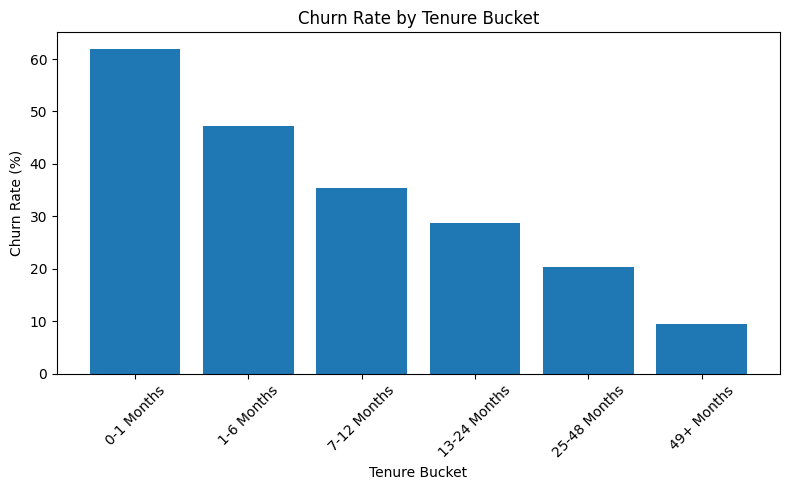

In [22]:
# 1) Churn rate by tenure bucket

# Drop rows where tenure_bucket is missing
tenure_data = df.dropna(subset=['tenure_bucket'])

tenure_stats = (
    tenure_data
    .groupby('tenure_bucket', observed=False)
    .agg(
        total_customers=('churn', 'count'),
        churned=('churn', 'sum')
    )
    .reset_index()
)

tenure_stats['churn_rate_pct'] = (tenure_stats['churned'] / tenure_stats['total_customers']) * 100

print("\nChurn rate by tenure_bucket:")
print(tenure_stats)

plt.figure(figsize=(8, 5))
plt.bar(tenure_stats['tenure_bucket'].astype(str),
        tenure_stats['churn_rate_pct'])
plt.xlabel('Tenure Bucket')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Churn rate by Contract:
         Contract  total_customers  churned  churn_rate_pct
0  Month-to-Month             3610     1655       45.844875
1        One Year             1550      166       10.709677
2        Two Year             1883       48        2.549124


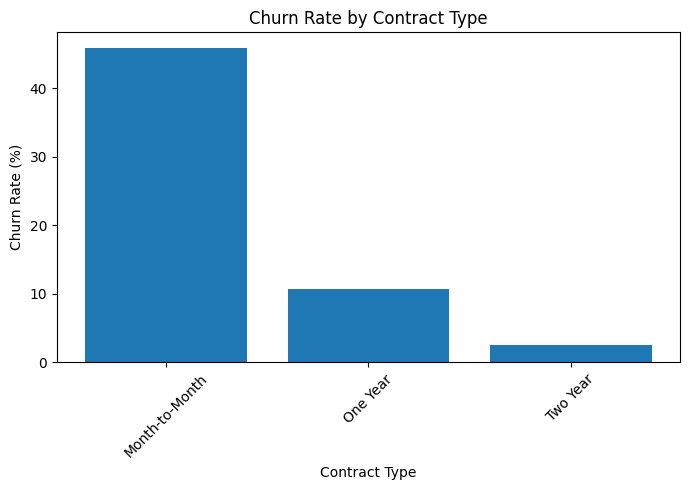

In [23]:

# Churn rate by Contract

import matplotlib.pyplot as plt
if 'Contract' in df.columns:
    contract_data = df.dropna(subset=['Contract'])

    contract_stats = (
        contract_data
        .groupby('Contract', observed=False)
        .agg(
            total_customers=('churn', 'count'),
            churned=('churn', 'sum')
        )
        .reset_index()
    )

    contract_stats['churn_rate_pct'] = (contract_stats['churned'] / contract_stats['total_customers']) * 100

    print("\nChurn rate by Contract:")
    print(contract_stats)

    plt.figure(figsize=(7, 5))
    plt.bar(contract_stats['Contract'].astype(str),
            contract_stats['churn_rate_pct'])
    plt.xlabel('Contract Type')
    plt.ylabel('Churn Rate (%)')
    plt.title('Churn Rate by Contract Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Churn rate by Internet_Type:
  Internet_Type  total_customers  churned  churn_rate_pct
0         Cable              830      213       25.662651
1           DSL             1652      307       18.583535
2   Fiber Optic             3035     1236       40.724876
3          None             1526      113        7.404980


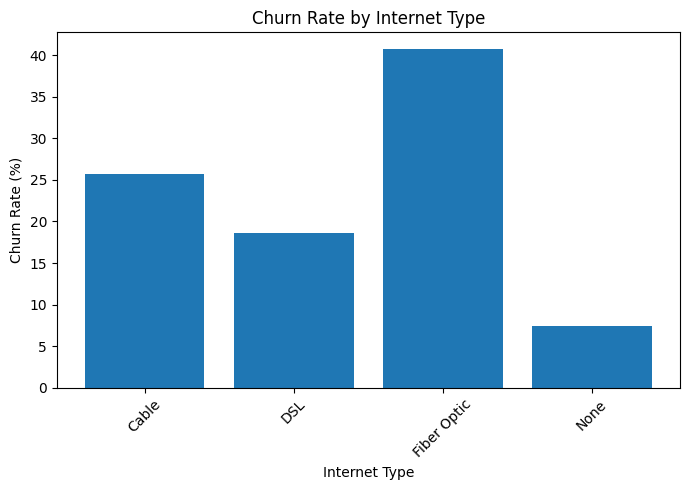

In [19]:

# Churn rate by Internet_Type


if 'Internet_Type' in df.columns:
    internet_data = df.dropna(subset=['Internet_Type'])

    internet_stats = (
        internet_data
        .groupby('Internet_Type', observed=False)
        .agg(
            total_customers=('churn', 'count'),
            churned=('churn', 'sum')
        )
        .reset_index()
    )

    internet_stats['churn_rate_pct'] = (internet_stats['churned'] / internet_stats['total_customers']) * 100

    print("\nChurn rate by Internet_Type:")
    print(internet_stats)

    plt.figure(figsize=(7, 5))
    plt.bar(internet_stats['Internet_Type'].astype(str),
            internet_stats['churn_rate_pct'])
    plt.xlabel('Internet Type')
    plt.ylabel('Churn Rate (%)')
    plt.title('Churn Rate by Internet Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Total revenue by churn status:
    status  total_revenue
0   Active   1.768667e+07
1  Churned   3.684460e+06


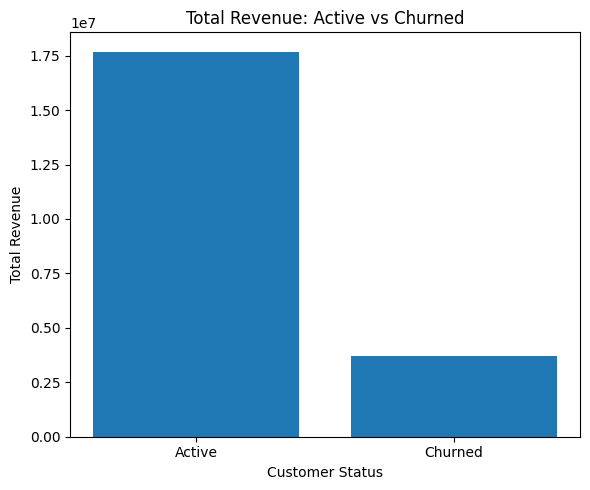

In [20]:

# Total Revenue: Active vs Churned


df['Total_Revenue'] = pd.to_numeric(df['Total_Revenue'], errors='coerce').fillna(0)

rev_stats = (
    df
    .groupby('churn', observed=False)
    .agg(total_revenue=('Total_Revenue', 'sum'))
    .reset_index()
)

rev_stats['status'] = rev_stats['churn'].map({0: 'Active', 1: 'Churned'})

print("\nTotal revenue by churn status:")
print(rev_stats[['status', 'total_revenue']])

plt.figure(figsize=(6, 5))
plt.bar(rev_stats['status'],
        rev_stats['total_revenue'])
plt.xlabel('Customer Status')
plt.ylabel('Total Revenue')
plt.title('Total Revenue: Active vs Churned')
plt.tight_layout()
plt.show()



Churn rate by age_bucket:
  age_bucket  total_customers  churned  churn_rate_pct
0   Under_30             1529      342       22.367560
1      30-44             1943      457       23.520329
2      45-59             1909      464       24.305919
3        60+             1662      606       36.462094


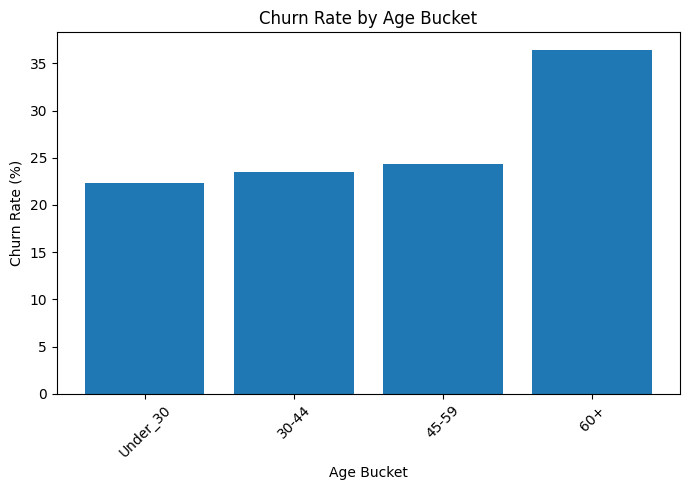

In [24]:
# Churn rate by age_bucket


# Drop rows where age_bucket is missing
age_data = df.dropna(subset=['age_bucket'])

age_stats = (
    age_data
    .groupby('age_bucket', observed=False)
    .agg(
        total_customers=('churn', 'count'),
        churned=('churn', 'sum')
    )
    .reset_index()
)

age_stats['churn_rate_pct'] = (age_stats['churned'] / age_stats['total_customers']) * 100

print("\nChurn rate by age_bucket:")
print(age_stats)

plt.figure(figsize=(7, 5))
plt.bar(age_stats['age_bucket'].astype(str),
        age_stats['churn_rate_pct'])
plt.xlabel('Age Bucket')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Age Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()